In [8]:
# TÔ QUANG TRƯỜNG 19146294
# Nhận dạng khuôn mặt
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [9]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/BT_AI_CNN/khuon_mat/dulieutrain'

In [12]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 227 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [13]:
train_dataset.classes
print(train_dataset.class_indices)

{'nguoikhac': 0, 'truongto': 1}


In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

In [16]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
227/227 [==============================] - 104s 409ms/step - loss: 0.4013 - accuracy: 0.8326 - val_loss: 0.6525 - val_accuracy: 0.6182
Epoch 2/20
227/227 [==============================] - 9s 39ms/step - loss: 0.0256 - accuracy: 0.9868 - val_loss: 0.1658 - val_accuracy: 0.9636
Epoch 3/20
227/227 [==============================] - 9s 39ms/step - loss: 0.0738 - accuracy: 0.9692 - val_loss: 0.2039 - val_accuracy: 0.9273
Epoch 4/20
227/227 [==============================] - 9s 40ms/step - loss: 0.0069 - accuracy: 0.9956 - val_loss: 0.3270 - val_accuracy: 0.8545
Epoch 5/20
227/227 [==============================] - 9s 39ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.7069 - val_accuracy: 0.7818
Epoch 6/20
227/227 [==============================] - 9s 39ms/step - loss: 8.8299e-04 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.8909
Epoch 7/20
227/227 [==============================] - 9s 39ms/step - loss: 6.8192e-04 - accuracy: 1.0000 - val_loss: 0.1914 - val_accur

In [19]:
model.predict(train_dataset)

array([[6.20720044e-08, 9.99999881e-01],
       [1.51837241e-11, 1.00000000e+00],
       [9.99761999e-01, 2.37999411e-04],
       [9.99998212e-01, 1.74514889e-06],
       [9.96119142e-01, 3.88092874e-03],
       [1.51444065e-05, 9.99984860e-01],
       [5.57532709e-12, 1.00000000e+00],
       [8.34471757e-06, 9.99991655e-01],
       [9.99999285e-01, 7.20227661e-07],
       [1.00000000e+00, 1.73430595e-12],
       [9.50734258e-01, 4.92657125e-02],
       [1.00000000e+00, 1.20773958e-09],
       [1.88396243e-11, 1.00000000e+00],
       [1.72964083e-05, 9.99982715e-01],
       [1.00000000e+00, 1.22029373e-10],
       [1.64031755e-12, 1.00000000e+00],
       [1.48845007e-08, 1.00000000e+00],
       [1.00000000e+00, 1.66008749e-15],
       [1.00000000e+00, 1.79102914e-15],
       [3.48631783e-11, 1.00000000e+00],
       [1.00000000e+00, 2.75400904e-15],
       [2.49749608e-08, 1.00000000e+00],
       [3.75103074e-12, 1.00000000e+00],
       [9.95728076e-01, 4.27185325e-03],
       [3.623608

In [20]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

nguoi khac 


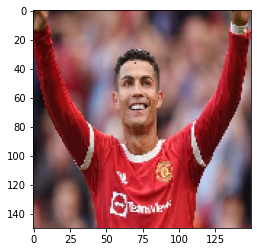

In [21]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/BT_AI_CNN/khuon_mat/nhandien/3.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("nguoi khac ")
if(test==1):
    print("truong to")

truong to


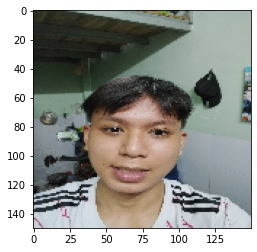

In [22]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/BT_AI_CNN/khuon_mat/nhandien/1.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("nguoi khac ")
if(test==1):
    print("truong to")